<a href="https://colab.research.google.com/github/srita2003/DL_Practicals/blob/main/DL_prac_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 1, 30).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Function to fit polynomial regression and plot
def plot_poly_regression(degree):
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot
    X_curve = np.linspace(0, 1, 100).reshape(-1, 1)
    y_curve = model.predict(poly.transform(X_curve))

    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="red", label="Test data")
    plt.plot(X_curve, y_curve, color="green", label=f"Degree {degree}")
    plt.title(f"Polynomial Regression (degree={degree})\nTrain MSE={train_error:.3f}, Test MSE={test_error:.3f}")
    plt.legend()
    plt.show()

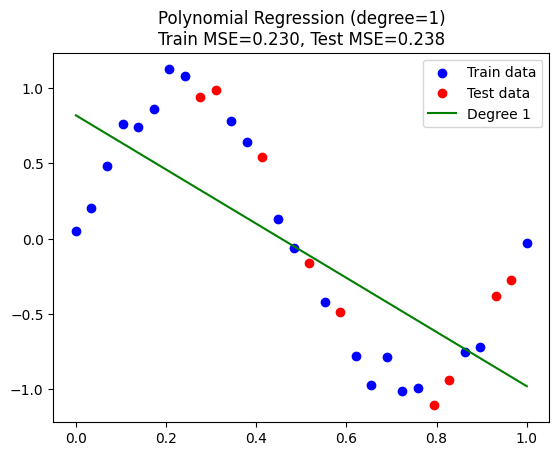

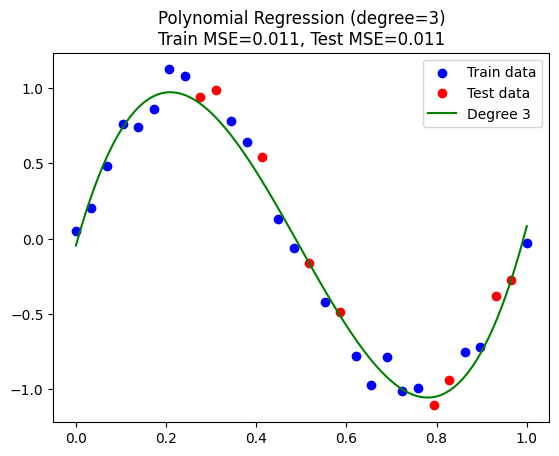

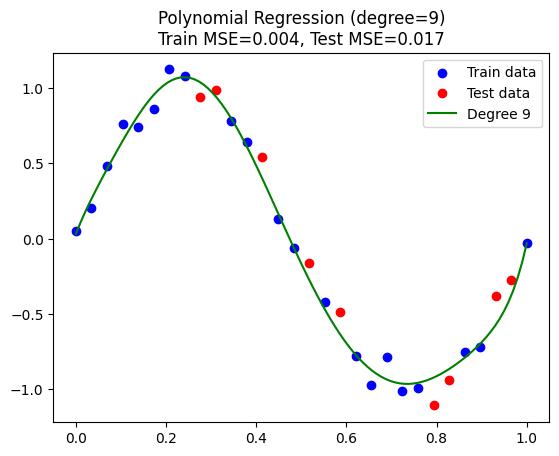

In [3]:
# 3. Experiment with different complexities
for d in [1, 3, 9]:
    plot_poly_regression(d)
